Circuit information extracted from circuit parser
<class 'qcadtrans.QCACircuit'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Constructing BQM...
Choosing solver...
Choosing D-Wave QPU as sampler...
Problem completed from selected sampler.
(numpy.record, [('sample', 'i1', (17,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')])
[-2.0625 -2.     -1.9375]
[21. 25.  4.]


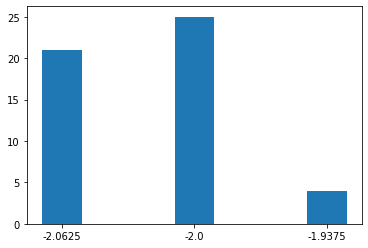

0.4
0.48


In [64]:
from qcadtrans import QCACircuit
from qca_leap_minimal import run_qca_minimal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

qcafile = 'COP1'
circuit = QCACircuit(fname=qcafile, verbose=True )
print(type(circuit))

print(circuit.nodes)

drivers = []
inputs = []
cells = []
output_cell_index = []

for i in range(len(circuit.nodes)):
        node = circuit.nodes[i]
        if node["cf"] == 0:
                cells.append(np.array((node["x"], node["y"], node["rot"])))
        elif node["cf"] == 3:
                drivers.append(np.array((node["x"], node["y"], node["pol"], node["rot"])))
        elif node["cf"] == 1:
                inputs.append(np.array((node["x"], node["y"], node["pol"], node["rot"])))
        elif node["cf"] == 2:
                cells.append(np.array((node["x"], node["y"], node["rot"])))
                output_cell_index.append(len(cells)-1)

inputs =  np.array(inputs)
drivers = np.array(drivers)
cells = np.array(cells)
output_cell_index = np.array(output_cell_index)
Ek = 1

def calc_Ek_reduc(i, j):
        dist = (((i[0] - j[0])/20)**2 + ((i[1] - j[1])/20)**2)**(1/2)
        return dist**5

for a in [-1]:
        for b in [-1]:
                inputs[0][2] = a
                inputs[1][2] = b

                if (len(drivers) == 0):
                        drivers = inputs
                else:
                        drivers = np.append(drivers, inputs, axis=0)

                h_array = []
                for i in range(0, cells.shape[0]):
                        input_e = 0 
                        for D in range(0, drivers.shape[0]):
                                reduc = calc_Ek_reduc(drivers[D], cells[i])
                                if reduc <= 2**5 and cells[i,2] == drivers[D,3]:
                                        EkiD = Ek/reduc
                                        pD = drivers[D,2]
                                        input_e = input_e + EkiD*pD
                        h_array.append(-input_e)
                h_array = np.array(h_array)

                J_matrix = np.zeros((cells.shape[0],cells.shape[0])) 
                for j in range(0, cells.shape[0]):
                        for i in range(0,cells.shape[0]):
                                reduc = calc_Ek_reduc(cells[j],cells[i])
                                if i < j and reduc <= 2**5 and cells[i,2] == cells[j,2]:                
                                        Ekij = Ek/reduc
                                        J_matrix[j][i] = -Ekij
                J_matrix = np.array(J_matrix)
                # print(J_matrix)

                response = run_qca_minimal(E_k=1, qpu_arch='pegasus', use_classical=True, 
                                        num_reads=50, show_inspector=False, plot_emb_path=None, 
                                        h_array = h_array, J_array= J_matrix)
                print(response.dtype)
                energy_levels = response['energy']
                bins = np.unique(energy_levels)
                counts = np.zeros(len(bins))
                for i in energy_levels:
                    index = np.where(bins == i)
                    counts[index[0]] = counts[index[0]] + 1 

                print(bins)
                print(counts)
                bins = [str(i) for i in bins]

                plt.bar(bins, counts, width=0.3)
                plt.show()

                drivers = drivers[:-2, :]

                out1 = response.sample[:,output_cell_index[0]]
                perc1 = len(np.where(out1==b)[0])/len(out1)
                print(perc1)

                out2 = response.sample[:,output_cell_index[1]]
                perc2 = len(np.where(out2==a)[0])/len(out2)
                print(perc2)

Circuit information extracted from circuit parser
<class 'qcadtrans.QCACircuit'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Constructing BQM...
Choosing solver...
Choosing D-Wave QPU as sampler...
Problem completed from selected sampler.
(numpy.record, [('sample', 'i1', (17,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')])
[-2.0625 -2.     -1.9375]
[25. 23.  2.]


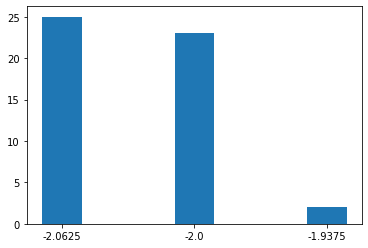

In [56]:
qcafile = 'COP1'
circuit = QCACircuit(fname=qcafile, verbose=True )
print(type(circuit))

print(circuit.nodes)

drivers = []
inputs = []
cells = []
output_cell_index = []

for i in range(len(circuit.nodes)):
        node = circuit.nodes[i]
        if node["cf"] == 0:
                cells.append(np.array((node["x"], node["y"], node["rot"])))
        elif node["cf"] == 3:
                drivers.append(np.array((node["x"], node["y"], node["pol"], node["rot"])))
        elif node["cf"] == 1:
                inputs.append(np.array((node["x"], node["y"], node["pol"], node["rot"])))
        elif node["cf"] == 2:
                cells.append(np.array((node["x"], node["y"], node["rot"])))
                output_cell_index.append(len(cells)-1)

inputs =  np.array(inputs)
drivers = np.array(drivers)
cells = np.array(cells)
output_cell_index = np.array(output_cell_index)
Ek = 1

def calc_Ek_reduc(i, j):
        dist = (((i[0] - j[0])/20)**2 + ((i[1] - j[1])/20)**2)**(1/2)
        return dist**5

for a in [-1]:
        for b in [-1]:
                inputs[0][2] = a
                inputs[1][2] = b

                if (len(drivers) == 0):
                        drivers = inputs
                else:
                        drivers = np.append(drivers, inputs, axis=0)

                h_array = []
                for i in range(0, cells.shape[0]):
                        input_e = 0 
                        for D in range(0, drivers.shape[0]):
                                reduc = calc_Ek_reduc(drivers[D], cells[i])
                                if reduc <= 2**5 and cells[i,2] == drivers[D,3]:
                                        EkiD = Ek/reduc
                                        pD = drivers[D,2]
                                        input_e = input_e + EkiD*pD
                        h_array.append(-input_e)
                h_array = np.array(h_array)

                J_matrix = np.zeros((cells.shape[0],cells.shape[0])) 
                for j in range(0, cells.shape[0]):
                        for i in range(0,cells.shape[0]):
                                reduc = calc_Ek_reduc(cells[j],cells[i])
                                if i < j and reduc <= 2**5 and cells[i,2] == cells[j,2]:                
                                        Ekij = Ek/reduc
                                        J_matrix[j][i] = -Ekij
                J_matrix = np.array(J_matrix)
                # print(J_matrix)

                response = run_qca_minimal(E_k=1, qpu_arch='pegasus', use_classical=False, 
                                        num_reads=50, show_inspector=False, plot_emb_path=None, 
                                        h_array = h_array, J_array= J_matrix)
                print(response.dtype)
                energy_levels = response['energy']
                bins = np.unique(energy_levels)
                counts = np.zeros(len(bins))
                for i in energy_levels:
                    index = np.where(bins == i)
                    counts[index[0]] = counts[index[0]] + 1 


                print(bins)
                print(counts)
                bins = [str(i) for i in bins]

                plt.bar(bins, counts, width=0.3)
                plt.show()

                drivers = drivers[:-2, :]